## Punto 1 esercizio d'esame: leggere i dati e esaminare la distribuzione del offset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Letura dei dati
file_path = "catalog.csv"
df = pd.read_csv(file_path)

#Selezino le colonne
z = df["BEST_Z"]
logM = df["logM500"]
offset = df["BCG_offset_R500"]

# Analisi statistica base delle distribuzioni
print("Statistiche di BCG_offset_R500:")
print(offset.describe())

print("Statistiche di LogM500:")
print(logM.describe())

print("Statistiche di BEST_Z:")
print(z.describe())

#trova modo per presentarle in modo piu ordinato e chiaro

Statistiche di BCG_offset_R500:
count    7567.000000
mean        0.317392
std         0.439892
min         0.000831
25%         0.048115
50%         0.121174
75%         0.399448
max         4.498073
Name: BCG_offset_R500, dtype: float64
Statistiche di LogM500:
count    7567.000000
mean       14.314848
std         0.309311
min        12.740363
25%        14.136721
50%        14.330819
75%        14.516469
max        15.208898
Name: logM500, dtype: float64
Statistiche di BEST_Z:
count    7567.000000
mean        0.331353
std         0.196929
min         0.050020
25%         0.181605
50%         0.295710
75%         0.438330
max         1.141850
Name: BEST_Z, dtype: float64


## Ora procedo con i plot dei dati per vedere le varie dipendenze

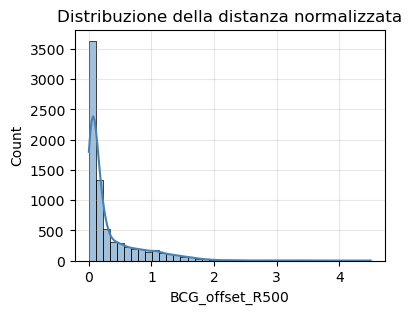

In [15]:
# visualizzo la distribuzione dell'offset

plt.figure(figsize=(4,3))
sns.histplot(offset, bins=40, kde=True, color="steelblue")
plt.xlabel("BCG_offset_R500")
plt.title("Distribuzione della distanza normalizzata")
plt.grid(alpha=0.3)
plt.show()

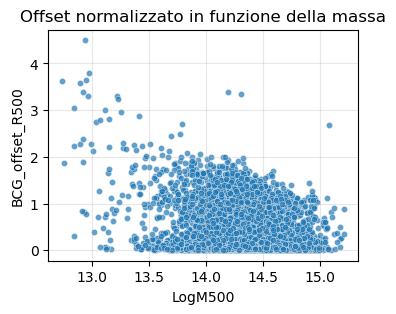

In [16]:
# Plot dell'Offset in funzione della massa
plt.figure(figsize=(4,3))
sns.scatterplot(x=logM, y=offset, s=20, alpha=0.7)
plt.xlabel("LogM500")
plt.ylabel("BCG_offset_R500")
plt.title("Offset normalizzato in funzione della massa")
plt.grid(alpha=0.3)
plt.show()

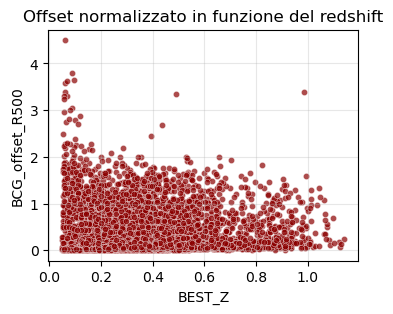

In [17]:
# Plot dell'Offset in funzione del redshift

plt.figure(figsize=(4,3))
sns.scatterplot(x=z, y=offset, s=20, alpha=0.7, color="darkred")
plt.xlabel("BEST_Z")
plt.ylabel("BCG_offset_R500")
plt.title("Offset normalizzato in funzione del redshift")
plt.grid(alpha=0.3)
plt.show()

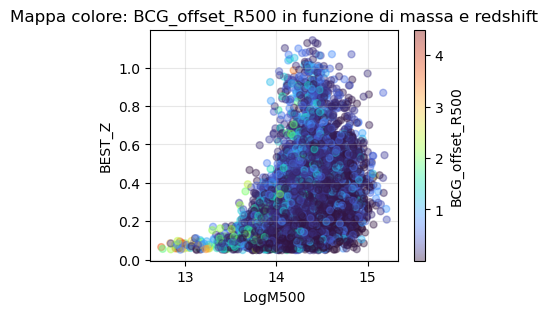

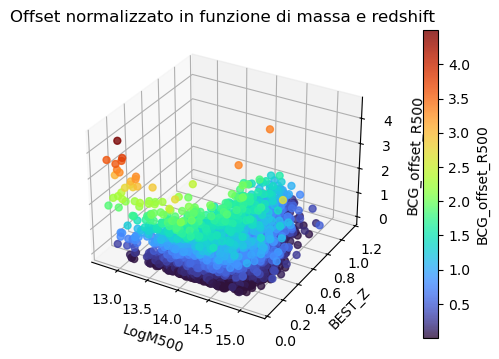

In [18]:
plt.figure(figsize=(4,3))

sc = plt.scatter(
    logM, z,
    c=offset,
    cmap="turbo",
    s=25,
    alpha=0.4
)

plt.xlabel("LogM500")
plt.ylabel("BEST_Z")
plt.title("Mappa colore: BCG_offset_R500 in funzione di massa e redshift")
cbar = plt.colorbar(sc)
cbar.set_label("BCG_offset_R500")

plt.grid(alpha=0.3)
plt.show()
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')

# scatter 3D con colore dato dall'offset
sc = ax.scatter(
    logM, 
    z, 
    offset, 
    c=offset,       
    cmap='turbo', 
    s=25,
    alpha=0.8
)

ax.set_xlabel("LogM500")
ax.set_ylabel("BEST_Z")
ax.set_zlabel("BCG_offset_R500")
ax.set_title("Offset normalizzato in funzione di massa e redshift")

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("BCG_offset_R500")

plt.show()